<a href="https://colab.research.google.com/github/Ryuma-code/Submission-Machine-Learning/blob/Submission-Akhir-Membangun-Proyek-Machine-Learning/%5BClustering%5D_Submission_Akhir_BMLP_Nurian_Alyasa_(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Ini data yang saya kumpulkan dari google dan dengan bantuan AI.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: 2680.
   - **Tipe Data**: **2 kategorikal** dan **3 numerikal**.
     - *Kategorikal*: Ekstrakurikuler, Kelompok_Belajar.
     - *Numerikal*:  Nilai_Ujian, Jam_Belajar_Mingguan, Kehadiran.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding/Submission Membangun Proyek Machine Learning/Perform_Pelajar.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,70,25,96,Tidak,Tidak.1
0,70,23,89,Tidak,Besar
1,70,21,99,Tidak,Kecil
2,94,3,70,Ya,Kecil
3,70,20,100,Tidak,Tidak
4,94,7,100,Ya,Tidak


In [ ]:
df.columns = ['Nilai_Ujian', 'Jam_Belajar_Mingguan', 'Kehadiran', 'Ekstrakurikuler', 'Kelompok_Belajar']

print(df.head())

   Nilai_Ujian  Jam_Belajar_Mingguan  Kehadiran Ekstrakurikuler  \
0           70                    23         89           Tidak   
1           70                    21         99           Tidak   
2           94                     3         70              Ya   
3           70                    20        100           Tidak   
4           94                     7        100              Ya   

  Kelompok_Belajar  
0            Besar  
1            Kecil  
2            Kecil  
3            Tidak  
4            Tidak  


# **4. Exploratory Data Analysis (EDA)**

### Memahami Struktur Data

In [ ]:
print("Number of rows and columns:", df.shape)
print("\nData types of each column:\n", df.dtypes)

Number of rows and columns: (2680, 5)

Data types of each column:
 Nilai_Ujian              int64
Jam_Belajar_Mingguan     int64
Kehadiran                int64
Ekstrakurikuler         object
Kelompok_Belajar        object
dtype: object


In [ ]:
df.describe()

,Nilai_Ujian,Jam_Belajar_Mingguan,Kehadiran
count,2680.000000,2680.000000,2680.000000
mean,80.509328,18.720522,89.795896
std,10.282566,10.389641,12.127716
min,70.000000,0.000000,70.000000
25%,70.000000,8.000000,80.000000
50%,78.000000,23.000000,96.000000
75%,90.000000,27.000000,100.000000
max,100.000000,38.000000,100.000000


### Menanggani MissingValue

In [ ]:
df.isnull().sum()

,0
Nilai_Ujian,0
Jam_Belajar_Mingguan,0
Kehadiran,0
Ekstrakurikuler,0
Kelompok_Belajar,0


### Analisis Distribusi & Korelasi

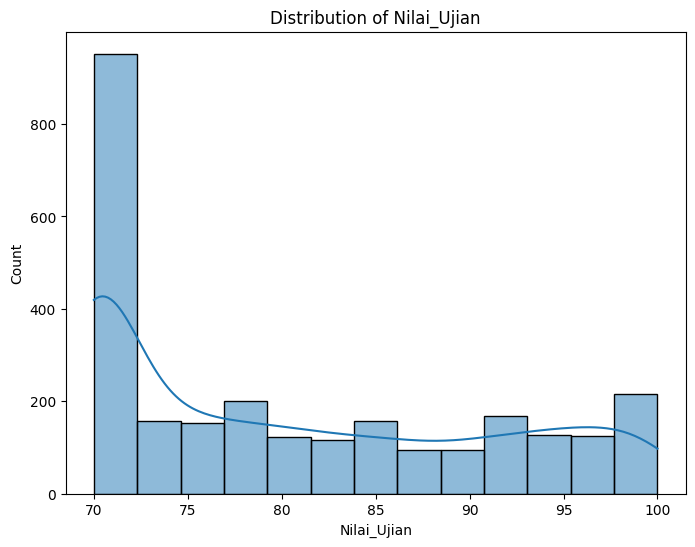

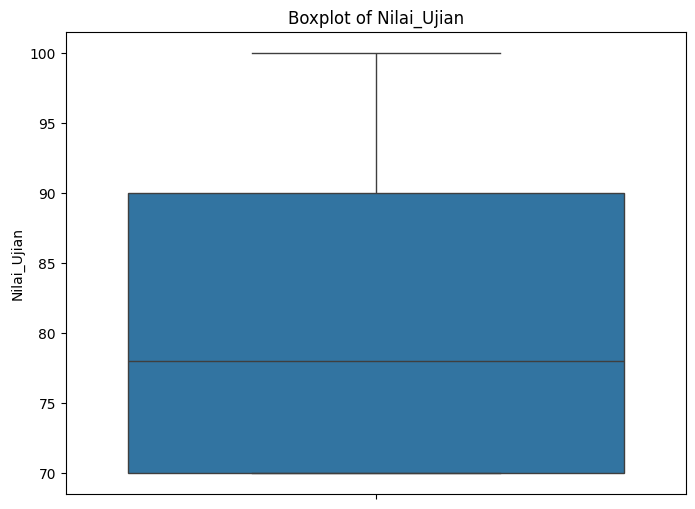

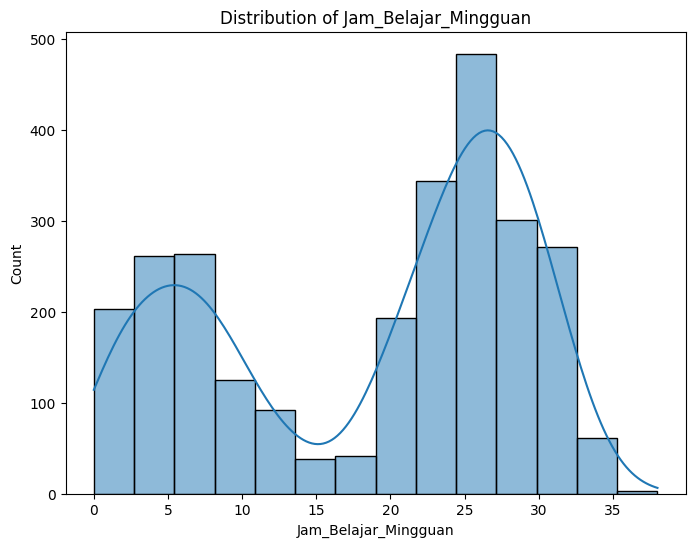

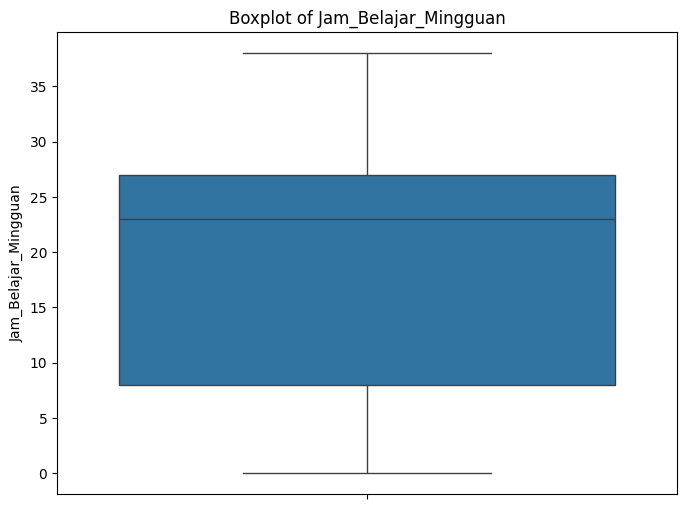

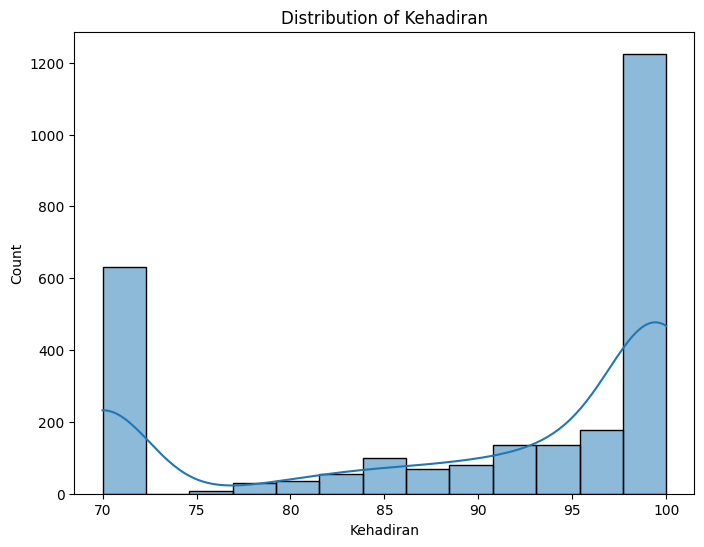

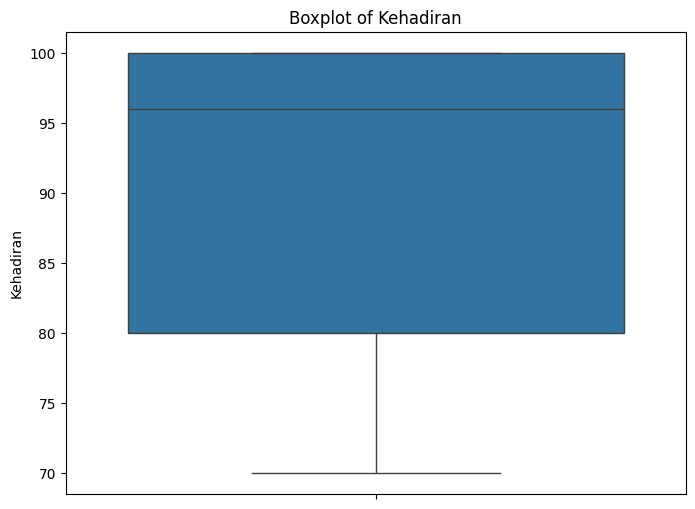

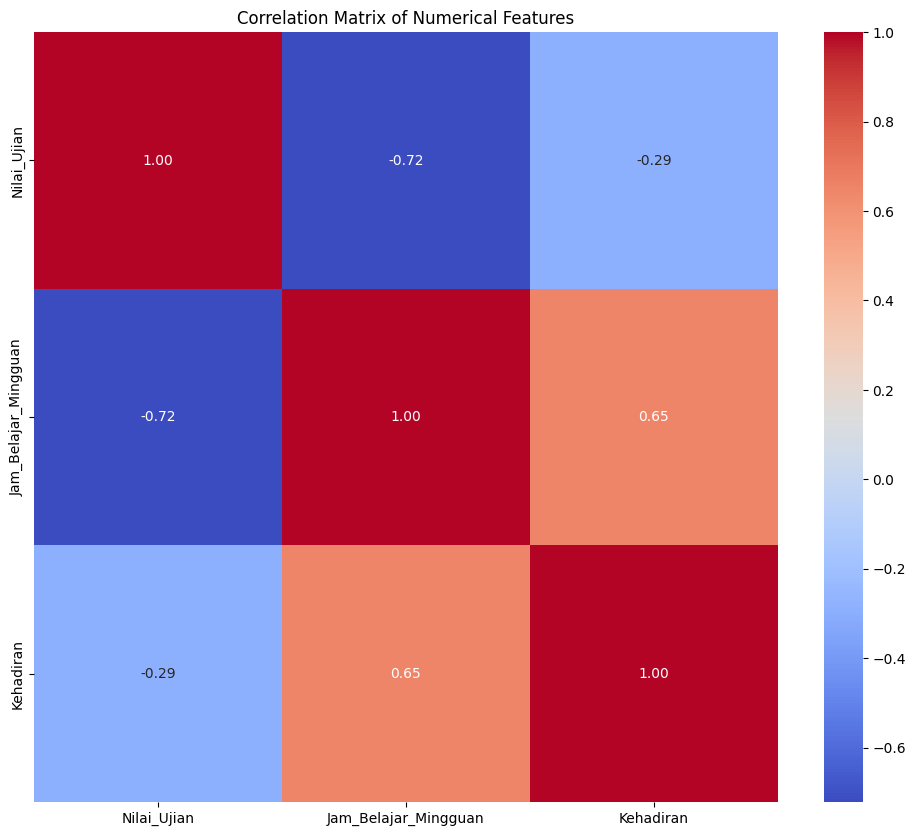

In [ ]:
numerical_features = df.select_dtypes(include=np.number)
for col in numerical_features.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

# Correlation matrix
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# **5. Data Preprocessing**

### Missing Value

In [ ]:
df.isnull().sum()

,0
Nilai_Ujian,0
Jam_Belajar_Mingguan,0
Kehadiran,0
Ekstrakurikuler,0
Kelompok_Belajar,0


### Data Duplicate

In [ ]:
df.duplicated().sum()

0

### Outlier

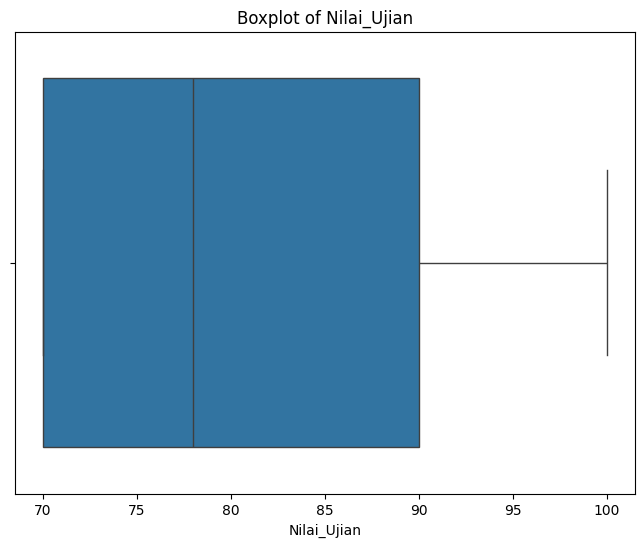

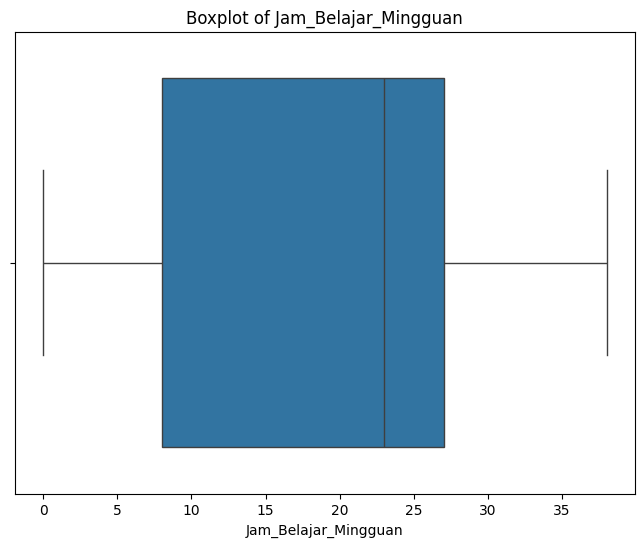

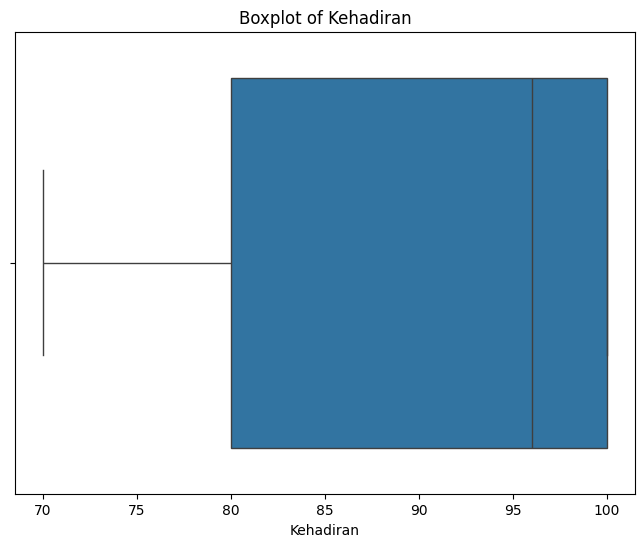

In [ ]:
numerical_features = df.select_dtypes(include=np.number)

for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Encoding

In [ ]:
kelompok_belajar_means = df.groupby('Kelompok_Belajar')['Nilai_Ujian'].mean()

df['Kelompok_Belajar_Target'] = df['Kelompok_Belajar'].map(kelompok_belajar_means)

ekstrakurikuler_means = df.groupby('Ekstrakurikuler')['Nilai_Ujian'].mean()

df['Ekstrakurikuler_Target'] = df['Ekstrakurikuler'].map(ekstrakurikuler_means)
print(df.head())

   Nilai_Ujian  Jam_Belajar_Mingguan  Kehadiran Ekstrakurikuler  \
0           70                    23         89           Tidak   
1           70                    21         99           Tidak   
2           94                     3         70              Ya   
3           70                    20        100           Tidak   
4           94                     7        100              Ya   

  Kelompok_Belajar  Kelompok_Belajar_Target  Ekstrakurikuler_Target  
0            Besar                80.585492               73.797027  
1            Kecil                80.493617               73.797027  
2            Kecil                80.493617               93.119227  
3            Tidak                80.463843               73.797027  
4            Tidak                80.463843               93.119227  


### Normalisasi & Standarisasi

In [ ]:
# MinMaxScaler
scaler = MinMaxScaler()

numerical_cols = ['Nilai_Ujian', 'Jam_Belajar_Mingguan', 'Kehadiran']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())

   Nilai_Ujian  Jam_Belajar_Mingguan  Kehadiran Ekstrakurikuler  \
0          0.0              0.605263   0.633333           Tidak   
1          0.0              0.552632   0.966667           Tidak   
2          0.8              0.078947   0.000000              Ya   
3          0.0              0.526316   1.000000           Tidak   
4          0.8              0.184211   1.000000              Ya   

  Kelompok_Belajar  Kelompok_Belajar_Target  Ekstrakurikuler_Target  
0            Besar                80.585492               73.797027  
1            Kecil                80.493617               73.797027  
2            Kecil                80.493617               93.119227  
3            Tidak                80.463843               73.797027  
4            Tidak                80.463843               93.119227  


In [ ]:
# StandardScaler
# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# print(df.head())

# TIDAK DIGUNAKAN KARENA MENGURANGI SCORE

### Binning

In [ ]:
bins = [0, 0.33, 0.66, 1]
labels = ['Rendah', 'Sedang', 'Tinggi']

for col in ['Nilai_Ujian', 'Jam_Belajar_Mingguan', 'Kehadiran']:
    df[col + '_Binned'] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)

print(df.head())

   Nilai_Ujian  Jam_Belajar_Mingguan  Kehadiran Ekstrakurikuler  \
0          0.0              0.605263   0.633333           Tidak   
1          0.0              0.552632   0.966667           Tidak   
2          0.8              0.078947   0.000000              Ya   
3          0.0              0.526316   1.000000           Tidak   
4          0.8              0.184211   1.000000              Ya   

  Kelompok_Belajar  Kelompok_Belajar_Target  Ekstrakurikuler_Target  \
0            Besar                80.585492               73.797027   
1            Kecil                80.493617               73.797027   
2            Kecil                80.493617               93.119227   
3            Tidak                80.463843               73.797027   
4            Tidak                80.463843               93.119227   

  Nilai_Ujian_Binned Jam_Belajar_Mingguan_Binned Kehadiran_Binned  
0             Rendah                      Sedang           Sedang  
1             Rendah              

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [ ]:
features = ['Nilai_Ujian', 'Jam_Belajar_Mingguan', 'Kehadiran', 'Ekstrakurikuler_Target', 'Kelompok_Belajar_Target']

X = df[features].copy()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

df['cluster'] = kmeans.labels_

print(df.head())
silhouette_avg = silhouette_score(X, df['cluster'])
print(f"Silhouette Score for the optimal model: {silhouette_avg}")

   Nilai_Ujian  Jam_Belajar_Mingguan  Kehadiran Ekstrakurikuler  \
0          0.0              0.605263   0.633333           Tidak   
1          0.0              0.552632   0.966667           Tidak   
2          0.8              0.078947   0.000000              Ya   
3          0.0              0.526316   1.000000           Tidak   
4          0.8              0.184211   1.000000              Ya   

  Kelompok_Belajar  Kelompok_Belajar_Target  Ekstrakurikuler_Target  \
0            Besar                80.585492               73.797027   
1            Kecil                80.493617               73.797027   
2            Kecil                80.493617               93.119227   
3            Tidak                80.463843               73.797027   
4            Tidak                80.463843               93.119227   

  Nilai_Ujian_Binned Jam_Belajar_Mingguan_Binned Kehadiran_Binned  cluster  \
0             Rendah                      Sedang           Sedang        1   
1             

## **b. Evaluasi Model Clustering**

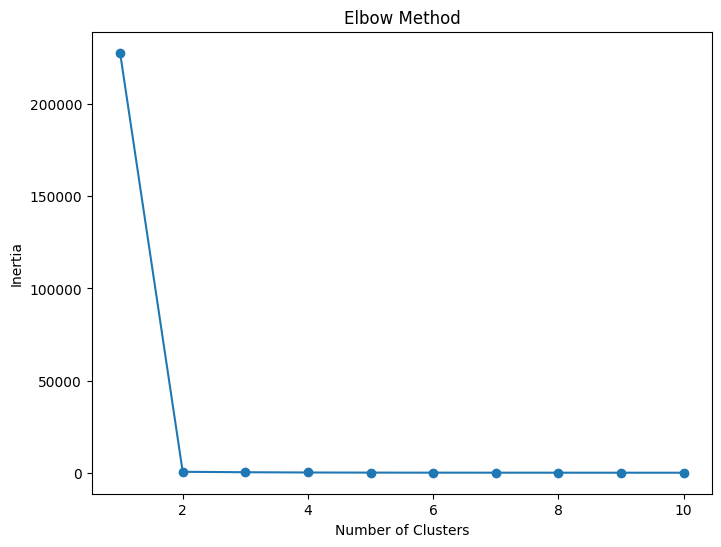

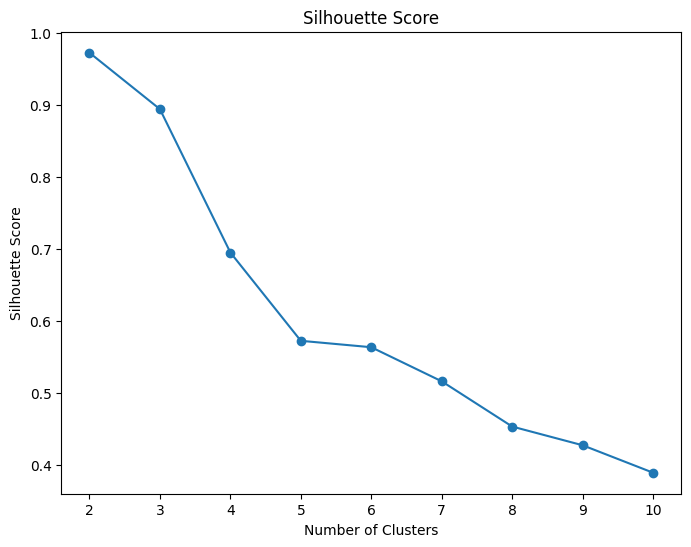

Optimal number of clusters based on silhouette score: 2
Silhouette Score for the optimal model: 0.9725941511758788


In [ ]:
# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 because the range starts from 2
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans_optimal.fit_predict(X)

silhouette_avg = silhouette_score(X, df['cluster'])
print(f"Silhouette Score for the optimal model: {silhouette_avg}")

## **c. Feature Selection (Opsional)**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, df['cluster'])

selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

print("Selected features:", selected_features)

X_selected = X[selected_features]

kmeans_selected = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster_selected'] = kmeans_selected.fit_predict(X_selected)


silhouette_avg_selected = silhouette_score(X_selected, df['cluster_selected'])
print(f"Silhouette Score for model with selected features: {silhouette_avg_selected}")

print(f"Original Silhouette Score: {silhouette_avg}")

Selected features: Index(['Nilai_Ujian', 'Jam_Belajar_Mingguan'], dtype='object')
Silhouette Score for model with selected features: 0.6815623665989385
Original Silhouette Score: 0.9725941511758788


## **d. Visualisasi Hasil Clustering**

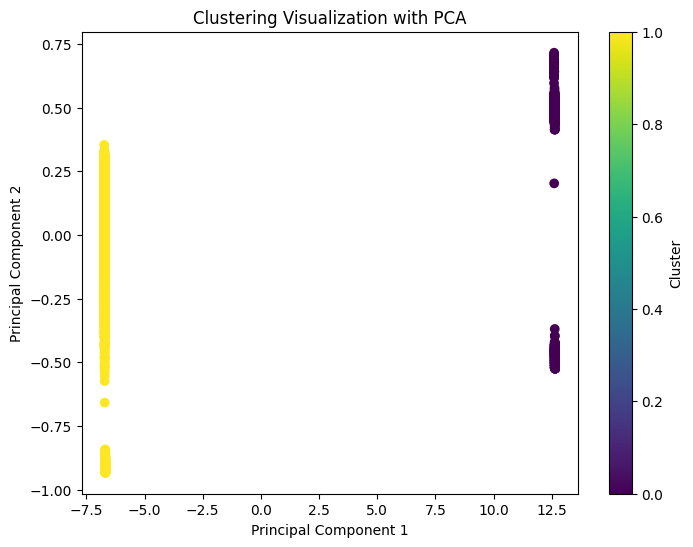

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [ ]:
df_normalized = df.copy()
df_normalized['Cluster'] = kmeans_optimal.labels_

In [ ]:
df_normalized.head()

,Nilai_Ujian,Jam_Belajar_Mingguan,Kehadiran,Ekstrakurikuler,Kelompok_Belajar,Kelompok_Belajar_Target,Ekstrakurikuler_Target,Nilai_Ujian_Binned,Jam_Belajar_Mingguan_Binned,Kehadiran_Binned,cluster,cluster_selected,Cluster
0,0.0,0.605263,0.633333,Tidak,Besar,80.585492,73.797027,Rendah,Sedang,Sedang,1,1,1
1,0.0,0.552632,0.966667,Tidak,Kecil,80.493617,73.797027,Rendah,Sedang,Tinggi,1,1,1
2,0.8,0.078947,0.000000,Ya,Kecil,80.493617,93.119227,Tinggi,Rendah,Rendah,0,0,0
3,0.0,0.526316,1.000000,Tidak,Tidak,80.463843,73.797027,Rendah,Sedang,Tinggi,1,1,1
4,0.8,0.184211,1.000000,Ya,Tidak,80.463843,93.119227,Tinggi,Rendah,Tinggi,0,0,0


In [ ]:
df_normalized = df.drop(columns=['Kelompok_Belajar_Target', 'Ekstrakurikuler_Target'], errors='ignore')

In [ ]:
df_normalized.head()

,Nilai_Ujian,Jam_Belajar_Mingguan,Kehadiran,Ekstrakurikuler,Kelompok_Belajar,Nilai_Ujian_Binned,Jam_Belajar_Mingguan_Binned,Kehadiran_Binned,cluster,cluster_selected
0,0.0,0.605263,0.633333,Tidak,Besar,Rendah,Sedang,Sedang,1,1
1,0.0,0.552632,0.966667,Tidak,Kecil,Rendah,Sedang,Tinggi,1,1
2,0.8,0.078947,0.000000,Ya,Kecil,Tinggi,Rendah,Rendah,0,0
3,0.0,0.526316,1.000000,Tidak,Tidak,Rendah,Sedang,Tinggi,1,1
4,0.8,0.184211,1.000000,Ya,Tidak,Tinggi,Rendah,Tinggi,0,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
df_normalized[numerical_cols] = scaler.inverse_transform(df_normalized[numerical_cols])
print(df_normalized.head())

   Nilai_Ujian  Jam_Belajar_Mingguan  Kehadiran Ekstrakurikuler  \
0         70.0                  23.0       89.0           Tidak   
1         70.0                  21.0       99.0           Tidak   
2         94.0                   3.0       70.0              Ya   
3         70.0                  20.0      100.0           Tidak   
4         94.0                   7.0      100.0              Ya   

  Kelompok_Belajar Nilai_Ujian_Binned Jam_Belajar_Mingguan_Binned  \
0            Besar             Rendah                      Sedang   
1            Kecil             Rendah                      Sedang   
2            Kecil             Tinggi                      Rendah   
3            Tidak             Rendah                      Sedang   
4            Tidak             Tinggi                      Rendah   

  Kehadiran_Binned  cluster  cluster_selected  
0           Sedang        1                 1  
1           Tinggi        1                 1  
2           Rendah        0           

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.


Cluster 1:
  Nilai_Ujian:
    Mean: 73.79702687249858
    Median: 72.0
    Std Dev: 4.534570018377261


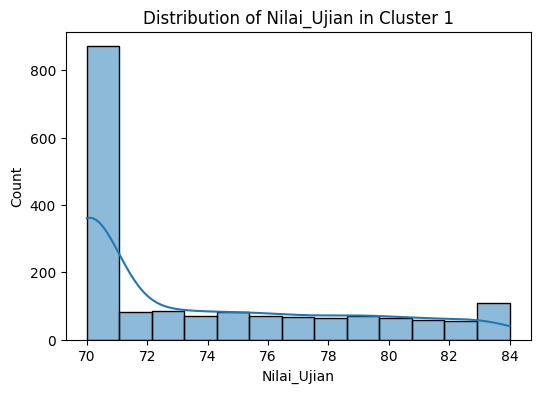

  Jam_Belajar_Mingguan:
    Mean: 24.120068610634647
    Median: 25.999999999999996
    Std Dev: 7.194374931771724


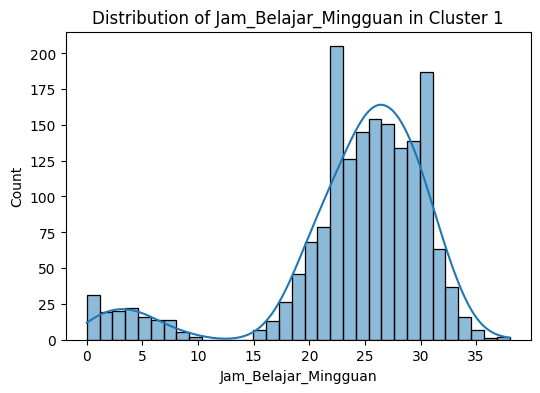

  Kehadiran:
    Mean: 92.75185820468839
    Median: 97.0
    Std Dev: 9.031292739546675


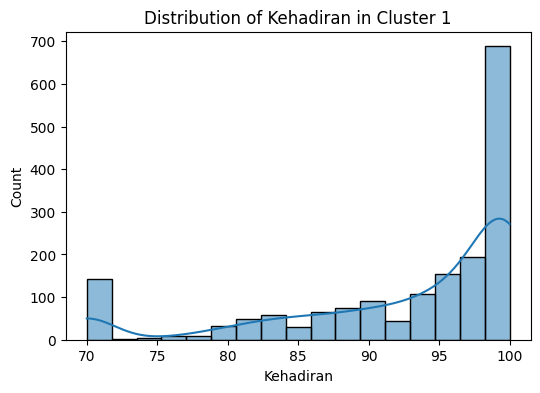

  Ekstrakurikuler:
    Frequency of values:
Ekstrakurikuler
Tidak    1749
Name: count, dtype: int64


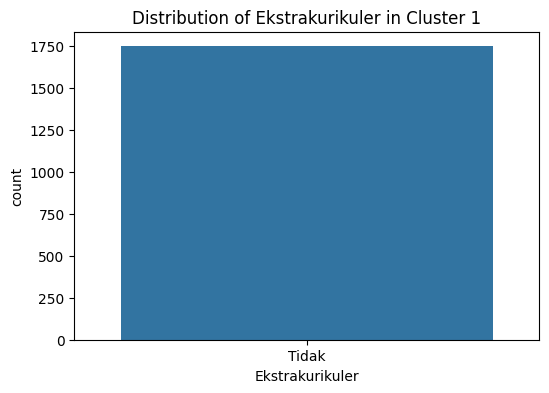

  Kelompok_Belajar:
    Frequency of values:
Kelompok_Belajar
Tidak    637
Kecil    616
Besar    496
Name: count, dtype: int64


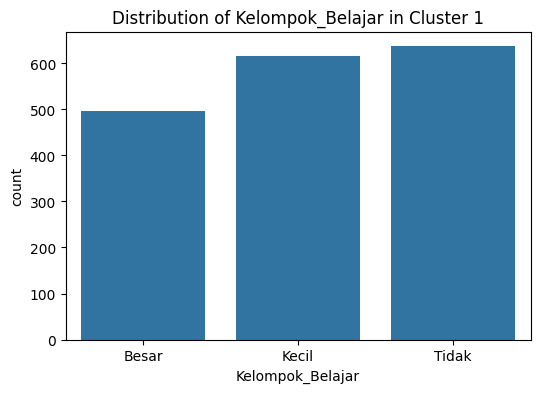


Cluster 0:
  Nilai_Ujian:
    Mean: 93.11922663802363
    Median: 94.0
    Std Dev: 4.691764214480391


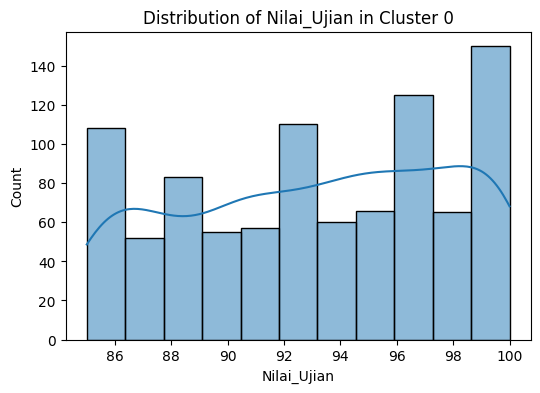

  Jam_Belajar_Mingguan:
    Mean: 8.576799140708916
    Median: 7.0
    Std Dev: 7.471901404843228


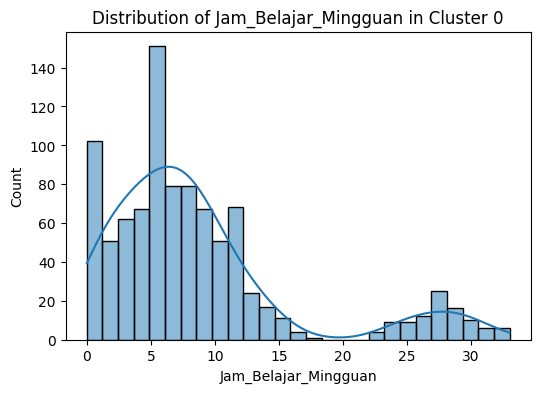

  Kehadiran:
    Mean: 84.24274973147153
    Median: 70.0
    Std Dev: 14.935889466358336


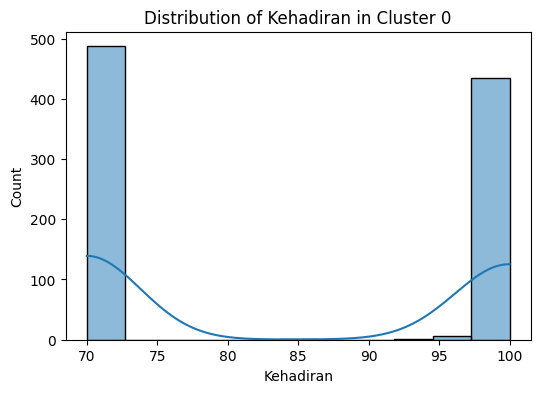

  Ekstrakurikuler:
    Frequency of values:
Ekstrakurikuler
Ya    931
Name: count, dtype: int64


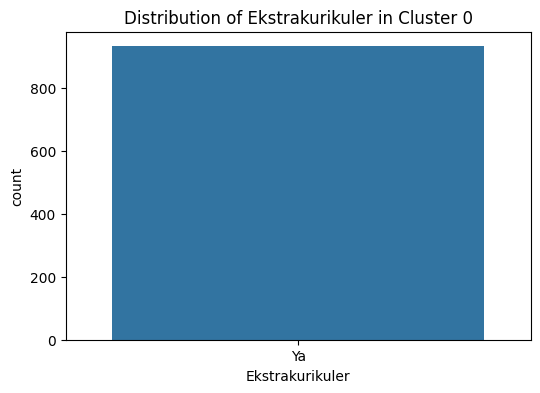

  Kelompok_Belajar:
    Frequency of values:
Kelompok_Belajar
Tidak    331
Kecil    324
Besar    276
Name: count, dtype: int64


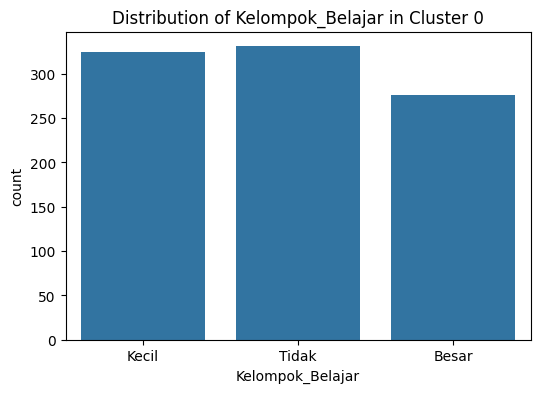

In [ ]:
for cluster_label in df_normalized['cluster'].unique():
    print(f"\nCluster {cluster_label}:")
    cluster_data = df_normalized[df_normalized['cluster'] == cluster_label]
    for col in ['Nilai_Ujian', 'Jam_Belajar_Mingguan', 'Kehadiran', 'Ekstrakurikuler', 'Kelompok_Belajar']:
        print(f"  {col}:")
        if cluster_data[col].dtype != object:
            print(f"    Mean: {cluster_data[col].mean()}")
            print(f"    Median: {cluster_data[col].median()}")
            print(f"    Std Dev: {cluster_data[col].std()}")
        else:
            print(f"    Frequency of values:")
            print(cluster_data[col].value_counts())


        plt.figure(figsize=(6, 4))
        if cluster_data[col].dtype != object:
            sns.histplot(cluster_data[col], kde=True)
        else:
            sns.countplot(x=col, data=cluster_data)
        plt.title(f'Distribution of {col} in Cluster {cluster_label}')
        plt.show()


Tulis hasil interpretasinya di sini.
1. Cluster 0:

*   Semua disini ikut ekstrakurikuler
*   Nilai ujian paling banyak di 100 dengan rentang 86-100
*  Jam belajar paling banyak di 0-5
* Kehadiran paling banyak 70% dengan rentang 70-100% walau jelas 75-90% itu tidak ada
* Paling banyak tidak punya kelompok belajar tapi hanya ada sedikit perbedaan dengan yang punya.

2. Cluster 1:


*   Semua disini tidak ikut ekstrakurikuler.
*   Nilai disini dominan di 70, rentan nilainya dari 70-84.
*   Kebanyakan jam belajar disini ada di 20-35.
* Dominan di 100% kehadiran dengan rentang 70-100.
* Paling banyak tidak punya kelompok belajar tapi hanya ada sedikit perbedaan dengan yang punya.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_normalized.to_csv('clustering_results.csv', index=False)